# CONCRETE COMPRESSIVE STRENGTH PREDICTION

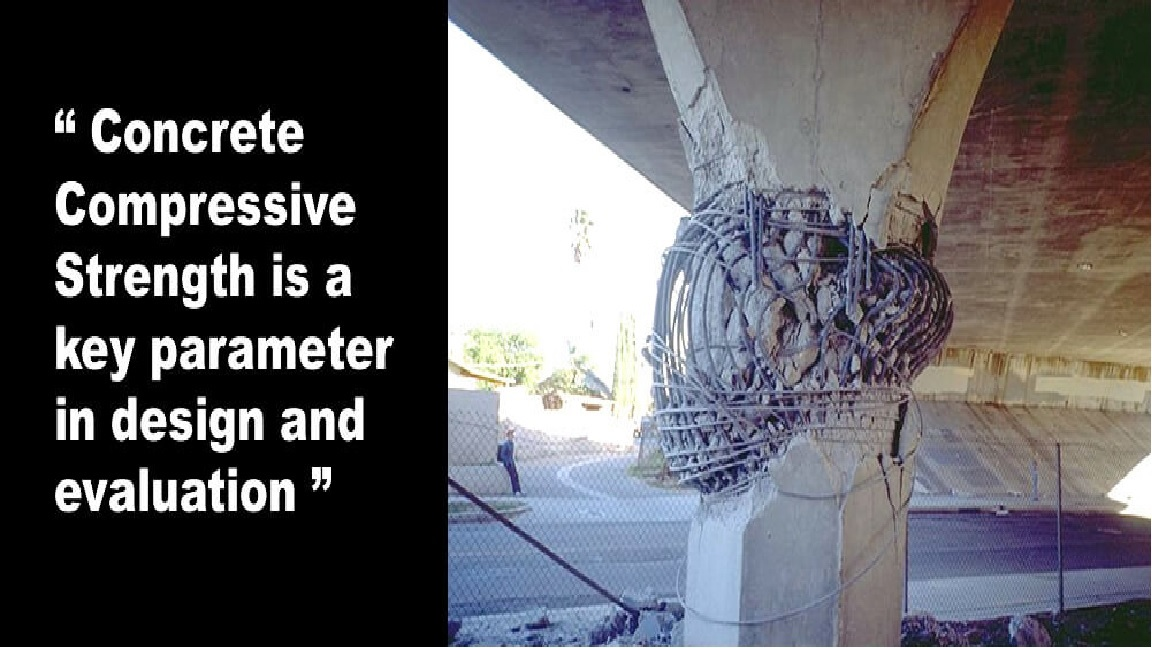

In [28]:
from IPython.display import Image
Image(r"C:\Users\shreya\Desktop\CCS.jpg",width=750,height=90) 

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to
reduce size, as opposed to tensile strength, which withstands loads tending to elongate.
Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice
that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube
or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive 
strength of concrete. The test requisites differ country to country based on the design code.

**The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include
cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
cc_data=pd.read_csv(r'C:\Users\shreya\Documents\Python Scripts\Concrete_Data.csv')

# Dataset Description

In [11]:
cc_data.head()

,Cement,BF Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),CCS(MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
cc_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BF Slag           1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   Coarse Aggregate  1030 non-null   float64
 6   Fine Aggregate    1030 non-null   float64
 7   Age (day)         1030 non-null   int64  
 8   CCS(MPa)          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


**Input variables in kg in a $m^3$ mixture <br>
Age in days(1-365) <br>
Concrete Compressive Strength in *MPa***  

*We must check for the duplicate entries in our dataset, else our model may not predict correct results.*

In [25]:
print('Number of duplicate entries: \n',sum(cc_data.duplicated())) 
duplicate_entries = pd.DataFrame(cc_data[cc_data.duplicated()])
duplicate_entries

Number of duplicate entries: 
 25


,Cement,BF Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),CCS(MPa)
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [3]:
cc_data = cc_data.drop_duplicates(keep='first')
cc_data.shape

(1005, 9)

**So we got rid of all the duplicate entries. The number of instances have now reduced from 1030 to 1005.**

In [4]:
cc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
BF Slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
Fly Ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
Water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
Superplasticizer,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
Coarse Aggregate,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
Fine Aggregate,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
Age (day),1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
CCS(MPa),1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


# Comparing the values of Input and Output variables

Text(0.5, 1.0, 'Box Plot of Inputs & Output')

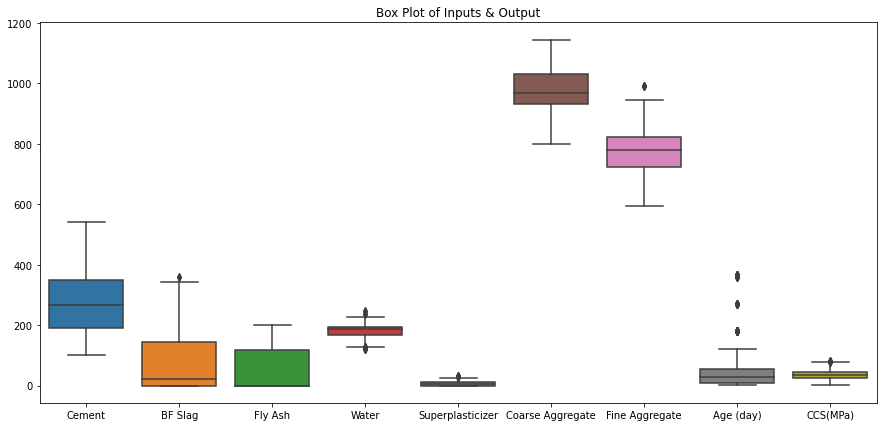

In [35]:
fig, axes = plt.subplots(figsize=(15,7))
t=sns.boxplot(data=cc_data)
t.set_xticklabels(t.get_xticklabels())
plt.title("Box Plot of Inputs & Output")

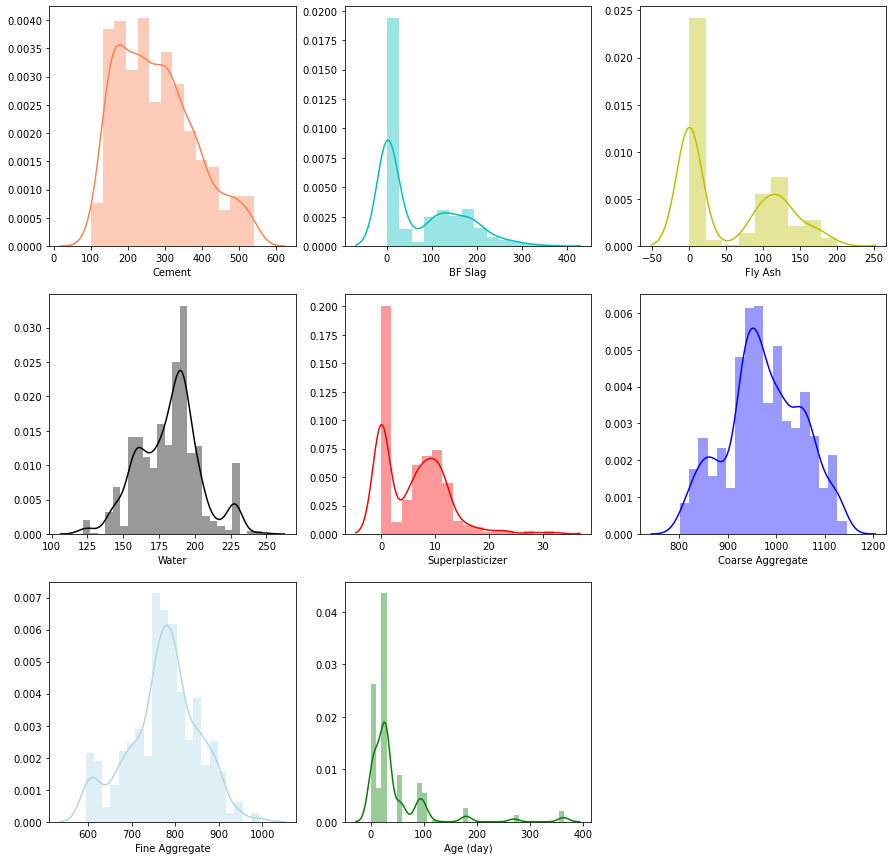

In [56]:
columns = np.array(cc_data.columns)
colors = np.array(['coral','c','y','k','r','b','lightblue','green'])

fig, axes = plt.subplots(figsize=(15,15))
for i in np.arange(1,9):
    plt.subplot(3,3,i)
    sns.distplot(cc_data[columns[i-1]],color=colors[i-1])

# Finding the correlation btw I/O Variables

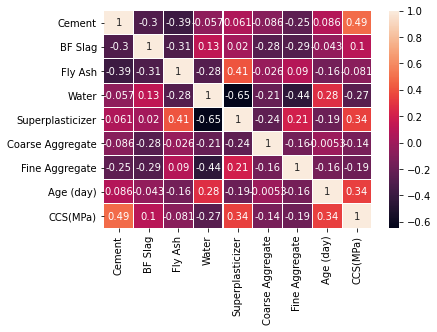

In [60]:
ccdata_cor=cc_data.corr()
sns.heatmap(ccdata_cor,annot=True, linewidth=0.05);

***The amount of cement, Superplasticizer, Age(days) and BF Slag are directly proportional to CCS(MPa) i.e. they have a positive correlation***

***While, Fly Ash, Water, Coarse Aggregate & Fine Aggregate have negative correlation with the strength of the material.*** 

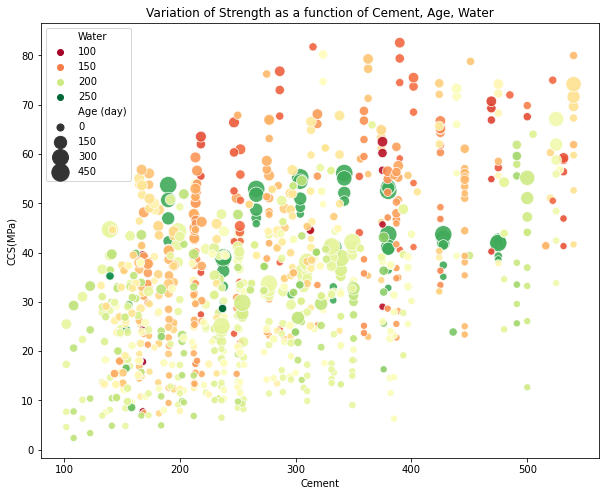

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="CCS(MPa)", x="Cement", hue="Water", size="Age (day)", data=cc_data, ax=ax, sizes=(50, 300),
                palette='RdYlGn', alpha=0.9)
ax.set_title("Variation of Strength as a function of Cement, Age, Water")
ax.legend()
plt.show()

For a cement having lesser age, and substantial amount of water, strength of the material is poor.

# Concentration of the Inputs when Output is maximum

In [61]:
cc_data.max()

Cement               540.0
BF Slag              359.4
Fly Ash              200.1
Water                247.0
Superplasticizer      32.2
Coarse Aggregate    1145.0
Fine Aggregate       992.6
Age (day)            365.0
CCS(MPa)              82.6
dtype: float64

In [62]:
cc_data[(cc_data['CCS(MPa)']==82.6)]

,Cement,BF Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),CCS(MPa)
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.6


In [63]:
cc_data[(cc_data['Cement']==540.0)]

,Cement,BF Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),CCS(MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
751,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61
752,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,14,59.76
753,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,28,67.31
754,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,90,69.66
755,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,180,71.62
756,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,270,74.17
799,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,3,41.64


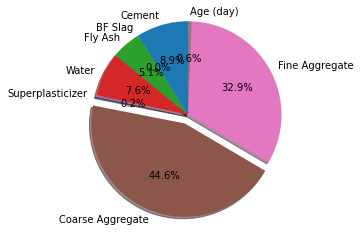

In [65]:
max_data=np.array(cc_data.drop(['CCS(MPa)'],axis=1).iloc[181]) 
labels=['Cement','BF Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age (day)']
explode = (0, 0, 0, 0, 0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(max_data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

The pie chart of the input variables concentration that give the max CCS(MPa).

Text(0.5, 0, 'Concrete compressive stength')

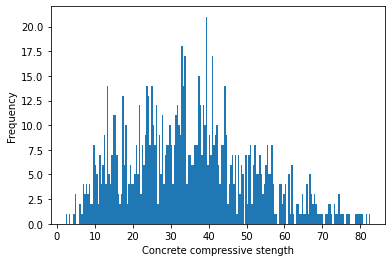

In [66]:
cc_data['CCS(MPa)'].plot.hist(bins=200)
plt.xlabel('Concrete compressive stength')

**Normal distribution curve shows that a majority of CCS(MPa) for different input variables is concentrated around 30-40MPa.**

# Regression Model

In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [27]:
lm=cc_data.drop('CCS(MPa)',axis=1)
x = lm.to_numpy()
y = np.array(cc_data['CCS(MPa)'])
y=y[:,np.newaxis]

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Linear Regression**

In [32]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
r2=r2_score(y_test,y_predict)
print('Linear regressor\n')
print('Root mean square error : ', rmse, '\n')
print('R2 score: ',r2)

Linear regressor

Root mean square error :  9.937709637651855 

R2 score:  0.609455388417037


**Polynomial Regression of order 2**

In [33]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)

x_poly_train = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_poly_train,y_train)
y_predict=model.predict(x_poly_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
r2=r2_score(y_test,y_predict)
print('Polynomial regressor of order 2\n')
print('Root mean square error : ', rmse, '\n')
print('R2 score: ',r2)

Polynomial regressor of order 2

Root mean square error :  8.1547341210392 

R2 score:  0.7370230675700626


**Polynomial Regression of order 3**

In [34]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)

x_poly_train = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_poly_train,y_train)
y_predict=model.predict(x_poly_test)


from sklearn.metrics import mean_squared_error, r2_score
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
r2=r2_score(y_test,y_predict)
print('Polynomial regressor of order 3\n')
print('Root mean square error : ', rmse, '\n')
print('R2 score: ',r2)

Polynomial regressor of order 3

Root mean square error :  6.034202300056992 

R2 score:  0.8560081950400871


**KNN Regressor of order 2**

In [38]:
from sklearn import neighbors
model=neighbors.KNeighborsRegressor(2)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=200, test_size=0.2)
cv_r2 = cross_val_score( model, x, y, scoring='r2', cv=cv)
print('Mean R2 score is: ',np.mean(cv_r2))

Mean R2 score is:  0.6750749731906046


**KNN Regressor of order 3**

In [39]:
from sklearn import neighbors
model=neighbors.KNeighborsRegressor(3)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=200, test_size=0.2)
cv_r2 = cross_val_score( model, x, y, scoring='r2', cv=cv) 
print('Mean R2 score is: ',np.mean(cv_r2))

Mean R2 score is:  0.6879029773546662
